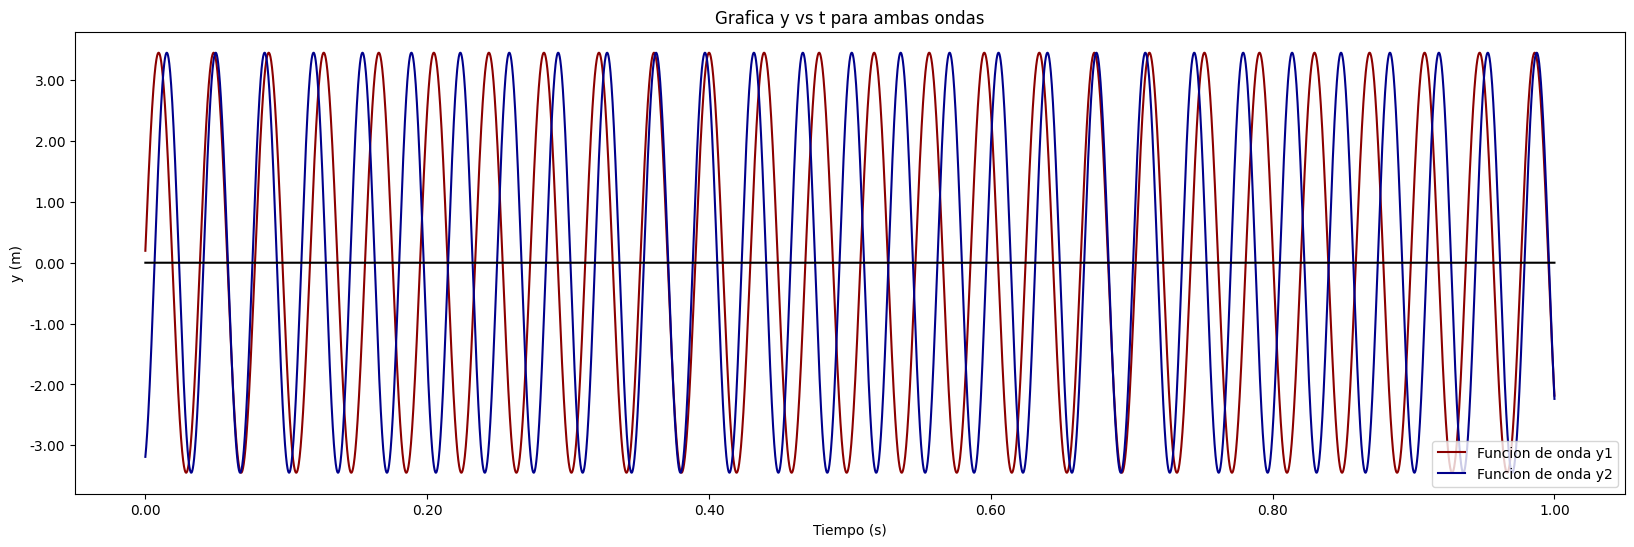

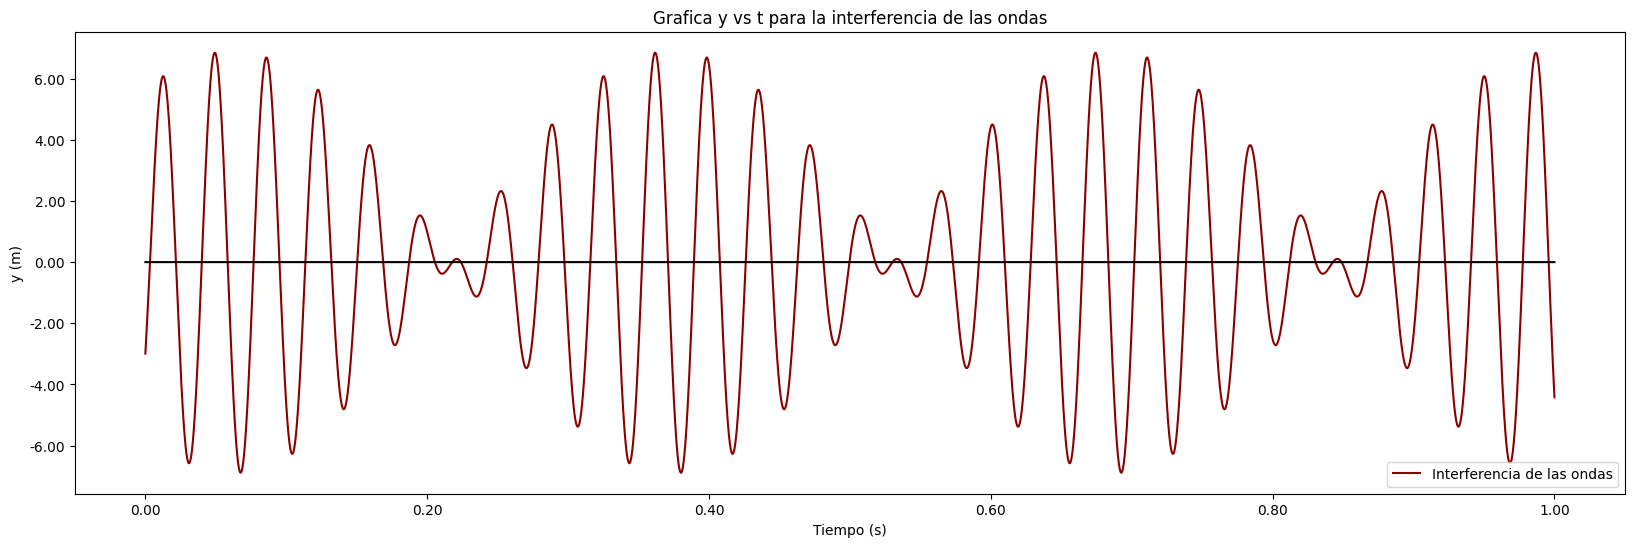

Frecuencia de pulso al analizar la distancia entre los valores maximos: 3.2
Frecuencia de pulso segun el modelo teorico: 28.8-25.6 = 3.2


In [5]:
#Interferencia en ondas mecanicas
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import pi
from math import cos, lcm
from matplotlib.ticker import FormatStrFormatter
#Parametros
A=3.45
v=340.0 #v=f*λ
pos_x=3.20
fas_1=0.0
fas_2=pi/3
frec_1=25.6
frec_2=28.8
k1=2*pi/(v/frec_1)
k2=2*pi/(v/frec_2)
w1=2*pi*frec_1
w2=2*pi*frec_2
#Funcion de onda para el x seleccionado
def f_onda_1 (t):
    return A*cos(k1*pos_x-w1*t+fas_1)
def f_onda_2 (t):
    return A*cos(k2*pos_x-w2*t+fas_2)
#Vectorizacion para pasarle arrays como parametro y retorne otro array
vect_1=np.vectorize(f_onda_1)
vect_2=np.vectorize(f_onda_2)
#Graficas de ambas ondas para un x determinado a lo largo del tiempo:
arr_t=np.linspace(0.0, 1.0, 10001)
arr_y=vect_1(arr_t)
arr_y2=vect_2(arr_t)
plt.figure(figsize=(20,6))
plt.title('Grafica y vs t para ambas ondas')
plt.xlabel("Tiempo (s)")
plt.ylabel("y (m)")
# Configurar el formato para 2 decimales en el eje x
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
# Configurar el formato para 2 decimales en el eje y
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.plot(arr_t,arr_y,color='darkred')
plt.plot(arr_t,arr_y2,color='darkblue')
plt.plot(arr_t,arr_t-arr_t,color='black')
plt.legend(["Funcion de onda y1", "Funcion de onda y2"], loc ="lower right")
plt.show()
plt.figure(figsize=(20,6))
plt.title('Grafica y vs t para la interferencia de las ondas')
plt.xlabel("Tiempo (s)")
plt.ylabel("y (m)")
# Configurar el formato para 2 decimales en el eje x
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
# Configurar el formato para 2 decimales en el eje y
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.plot(arr_t,arr_y+arr_y2,color='darkred')
plt.plot(arr_t,arr_t-arr_t,color='black')
plt.legend(["Interferencia de las ondas"], loc ="lower right")
plt.show()
#Calculo de la frecuencia
#Para el grafico resultante, una alternativa seria encontrar el valor maximo de y, se elige
#el maximo porque este solo se repite 1 vez en cada ciclo a diferencia de valores cercanos al centro.
#Asi que primero buscamos el valor maximo que aparece en el array de las y, luego buscamos la distancia
#a la que se encuentran estos valores maximos para ver cuánto tiempo debe pasar para que vuelva a aparecer.
y_max=np.max((arr_y+arr_y2).round(decimals=10, out=None))
#Posiciones sera el un array con los indices en los que se encontro el valor max
posiciones = np.where((arr_y+arr_y2).round(decimals=10, out=None) == y_max)[0]
#Debido a que hay 10001 terminos entre el 0 y 1, cada termino consecutivo esta separado 0.0001
dif_tiempo=(posiciones[1]-posiciones[0])*0.0001
frec_int=1/dif_tiempo
#Una vez que tenemos la frecuencia obtenida por los valores conseguidos por medio del grafico. Podemos
#comparar dicha frecuencia con el modelo teórico (frec_pulso=|f1-f2|)
print("Frecuencia de pulso al analizar la distancia entre los valores maximos:", frec_int)
print("Frecuencia de pulso segun el modelo teorico:", "28.8-25.6 =", 3.2)
